loading data and analysing

In [5]:
import pandas as pd
import numpy as np
salesdata=pd.read_csv('advertising.csv')

In [6]:
salesdata

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## Data exploration

In [4]:
salesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
salesdata.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

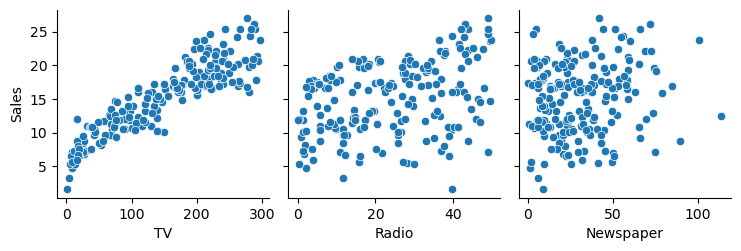

In [7]:
import seaborn as sns
sns.pairplot(salesdata,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],kind='scatter')

training and testing

In [15]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


X = salesdata.drop(['Sales'], axis=1)
y = salesdata['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)
    

LinearRegression()

Evaluation metrics

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model_lr.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)
print(f"Linear Regression MSE: {mse_linear}, R2: {r2_linear}")

#print("Accuracy Score:", accuracy_score(y_test, y_pred))

Linear Regression MSE: 2.907756910271091, R2: 0.9059011844150826


In [24]:
y_pred1=model_lr.predict(X_train)
y_pred1

array([11.91465765, 15.32881375,  9.91093345,  9.46132618, 17.23412363,
        7.22972412, 10.35454191, 15.23876611, 11.14036535, 11.71856758,
       13.85060866, 14.66570876, 10.44983379,  9.28550764,  9.02357336,
       12.47875166, 10.48712079, 24.99748731,  7.88523289, 15.8640533 ,
       21.30888748, 17.00814942, 12.79206695,  9.84041429, 21.01070892,
        7.48343928, 23.52204082,  7.05636619, 12.56968457, 10.08676368,
       11.1715446 ,  9.12566707, 16.92180225, 17.90167068, 15.63428805,
       18.26514616, 15.51584207, 19.23176429, 17.48701831, 21.82555114,
       10.58560762, 14.22101675, 10.75778538, 18.10690693,  9.94580615,
       17.38762989, 13.21321157, 23.7057409 , 11.04124955, 23.50498043,
        7.25377772, 19.17388849, 24.9725586 , 21.21199698, 18.85730214,
       16.49383903, 13.90044002, 11.26132856, 19.58689909, 15.32197517,
       15.91287266, 10.29394498, 20.24916557, 12.59260311, 21.37507598,
       11.62060518,  9.00761916, 19.44123849, 15.85637182, 18.57

C:\Users\giris\AppData\Local\Temp\ipykernel_43484\3106527266.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res,bins=15)


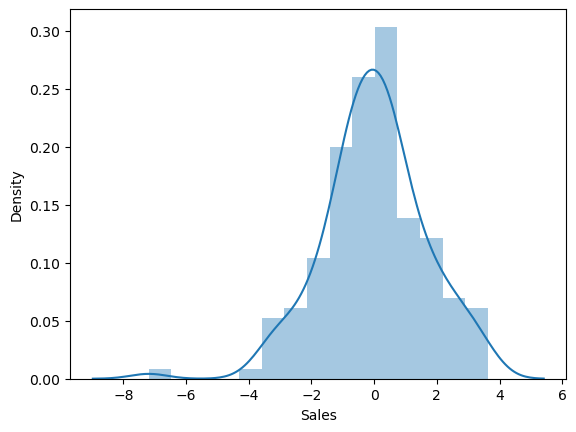

In [25]:
res=(y_train - y_pred1)
sns.distplot(res,bins=15)
plt.show()

C:\Users\giris\AppData\Local\Temp\ipykernel_43484\1968298468.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res,bins=15)


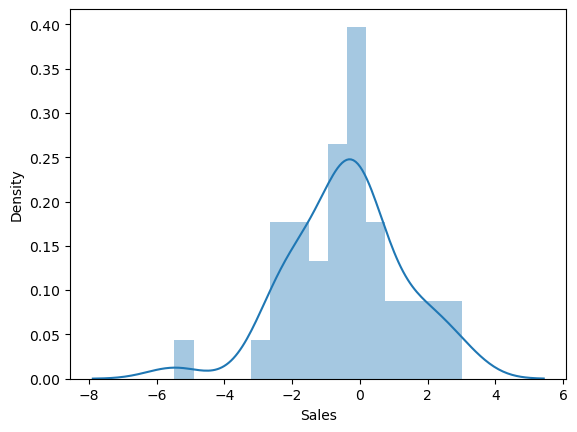

In [29]:
res=(y_test - y_pred)
sns.distplot(res,bins=15)
plt.show()

In [31]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svr = svm_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_svr)
r2_linear = r2_score(y_test, y_pred_svr)
print(f"Linear Regression MSE: {mse_linear}, R2: {r2_linear}")

Linear Regression MSE: 3.499087197255254, R2: 0.886764963148391


In [32]:
y_pred1_svr= svm_model.predict(X_train)
y_pred1_svr

array([13.05154983, 16.21921799,  9.46855435,  9.97835035, 17.76343873,
        8.41573911, 10.66855738, 15.69517978, 12.29101683, 11.57206214,
       12.75661841, 15.74510629,  9.71487561,  8.64888731, 10.39070709,
       13.73579193, 10.89110863, 21.53498895,  8.1237048 , 16.73018228,
       19.44898769, 17.38080764, 13.42079533,  9.38083938, 19.21428217,
        7.93808067, 20.1306008 ,  7.7877568 , 13.94235881,  9.26616338,
       12.29368967, 10.63715151, 17.39738089, 17.8612814 , 15.54667084,
       18.24897215, 15.74111844, 18.38230935, 18.17994197, 20.42280884,
        9.70852696, 14.43670139, 11.56822473, 18.06111251, 10.81391208,
       17.87873061, 12.74582976, 20.70575069, 10.10641353, 21.36468583,
        7.90054617, 18.81315386, 20.78927888, 19.54640313, 18.51802675,
       16.40901863, 14.57913688, 10.6109864 , 19.25373604, 15.66878228,
       16.83356507, 11.63593073, 19.70743655, 14.0982161 , 19.83604547,
       12.23669467,  9.91329748, 19.22514483, 16.48202596, 18.46

C:\Users\giris\AppData\Local\Temp\ipykernel_43484\3915065838.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res,bins=15)


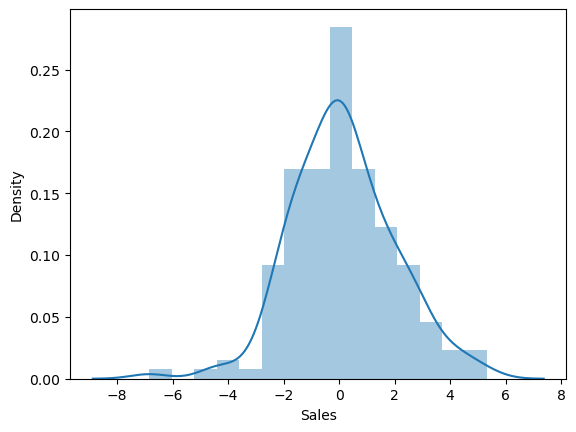

In [34]:
res=(y_train - y_pred1_svr)
sns.distplot(res,bins=15)
plt.show()

C:\Users\giris\AppData\Local\Temp\ipykernel_43484\3601241432.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res,bins=15)


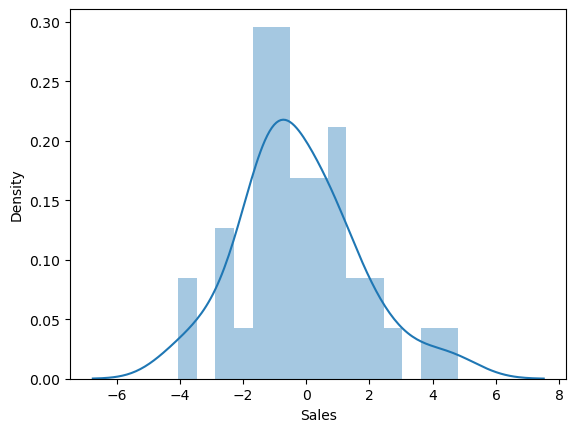

In [33]:
res=(y_test - y_pred_svr)
sns.distplot(res,bins=15)
plt.show()